# Ethnic Power Relations (EPR)

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("EPR.csv").convert_dtypes()

### Rows and columns

In [4]:
rows, columns = df.shape
print(f"Rows: {rows}, Columns: {columns}")

Rows: 58725, Columns: 13


In [5]:
df['date'] = pd.to_datetime(df['yearmon'], errors='coerce').dt.date
df = df.convert_dtypes()
df = df.set_index(['date']).sort_index()
df = df.drop(columns=['yearmon'])

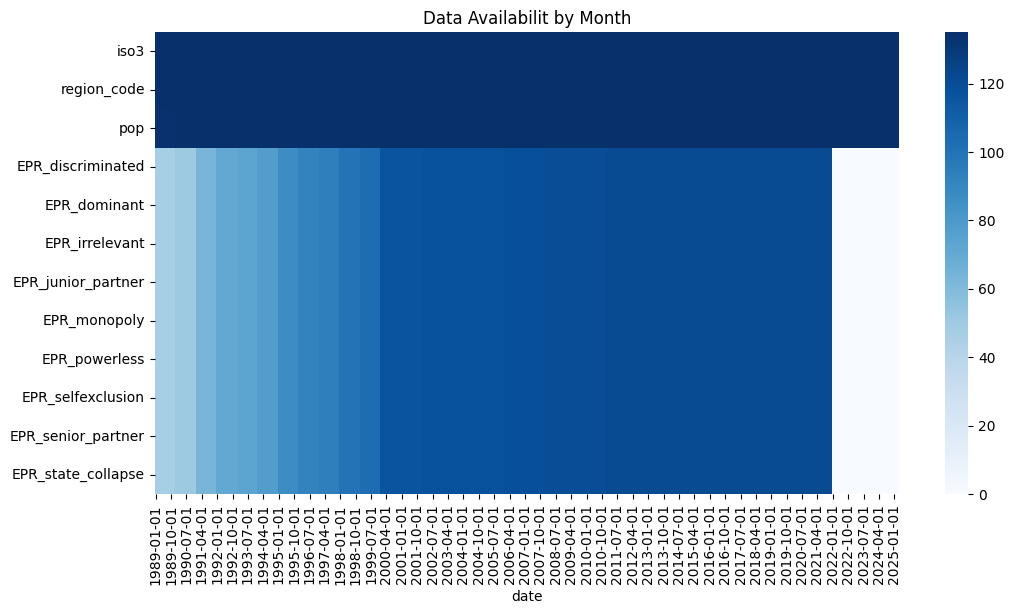

In [6]:
missing_by_month = df.groupby('date').count()
plt.figure(figsize=(12, 6))
sns.heatmap(missing_by_month.astype(float).T, cmap='Blues')
plt.title('Data Availabilit by Month')
plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58725 entries, 1989-01-01 to 2025-03-01
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   iso3                58725 non-null  string 
 1   region_code         58725 non-null  string 
 2   pop                 58713 non-null  Float64
 3   EPR_discriminated   41928 non-null  Float64
 4   EPR_dominant        41928 non-null  Float64
 5   EPR_irrelevant      41928 non-null  Float64
 6   EPR_junior_partner  41928 non-null  Float64
 7   EPR_monopoly        41928 non-null  Float64
 8   EPR_powerless       41928 non-null  Float64
 9   EPR_selfexclusion   41928 non-null  Float64
 10  EPR_senior_partner  41928 non-null  Float64
 11  EPR_state_collapse  41928 non-null  boolean
dtypes: Float64(9), boolean(1), string(2)
memory usage: 6.0+ MB


In [8]:
df.describe(include='string').T

,count,unique,top,freq
iso3,58725,135,AFG,435
region_code,58725,6,SSA,20445


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pop,58713.0,41259533.486332,153319719.021372,8662.0,2108617.0,8303151.0,25698326.0,1438069596.0
EPR_discriminated,41928.0,0.030879,0.091361,0.0,0.0,0.0,0.004,0.84
EPR_dominant,41928.0,0.199724,0.334712,0.0,0.0,0.0,0.41,0.966
EPR_irrelevant,41928.0,0.131986,0.327271,0.0,0.0,0.0,0.0,1.0
EPR_junior_partner,41928.0,0.1431,0.221733,0.0,0.0,0.0,0.24,0.86
EPR_monopoly,41928.0,0.104381,0.277734,0.0,0.0,0.0,0.0,0.979
EPR_powerless,41928.0,0.124945,0.186464,0.0,0.0,0.04,0.152,0.86
EPR_selfexclusion,41928.0,0.004214,0.029408,0.0,0.0,0.0,0.0,0.495
EPR_senior_partner,41928.0,0.185968,0.275258,0.0,0.0,0.0,0.314,1.0


### Missing Values

In [10]:
total_rows = len(df)
missing_count = df.isnull().sum()
missing_percent = (missing_count / total_rows * 100).round(2)
missing_df = pd.DataFrame({'Missing Count': missing_count, 'Missing Percentage (%)': missing_percent})
missing_df = missing_df.sort_values(by='Missing Percentage (%)', ascending=False)
missing_df

,Missing Count,Missing Percentage (%)
EPR_discriminated,16797,28.60
EPR_junior_partner,16797,28.60
EPR_irrelevant,16797,28.60
EPR_dominant,16797,28.60
EPR_powerless,16797,28.60
EPR_selfexclusion,16797,28.60
EPR_senior_partner,16797,28.60
EPR_monopoly,16797,28.60
EPR_state_collapse,16797,28.60
pop,12,0.02


### Dropping missing values 

In [11]:
columns = missing_df[missing_df['Missing Percentage (%)'] < 70].index
df = df[columns]

numeric_df = df.select_dtypes(include=['number']).dropna()


In [12]:
missing_by_iso3 = df.groupby('iso3').count()
missing_by_month = df.groupby('date').count()

### Correlation Matrix

In [13]:
#Correlation Matrix
correlation_matrix_df = numeric_df.corr(method='pearson')

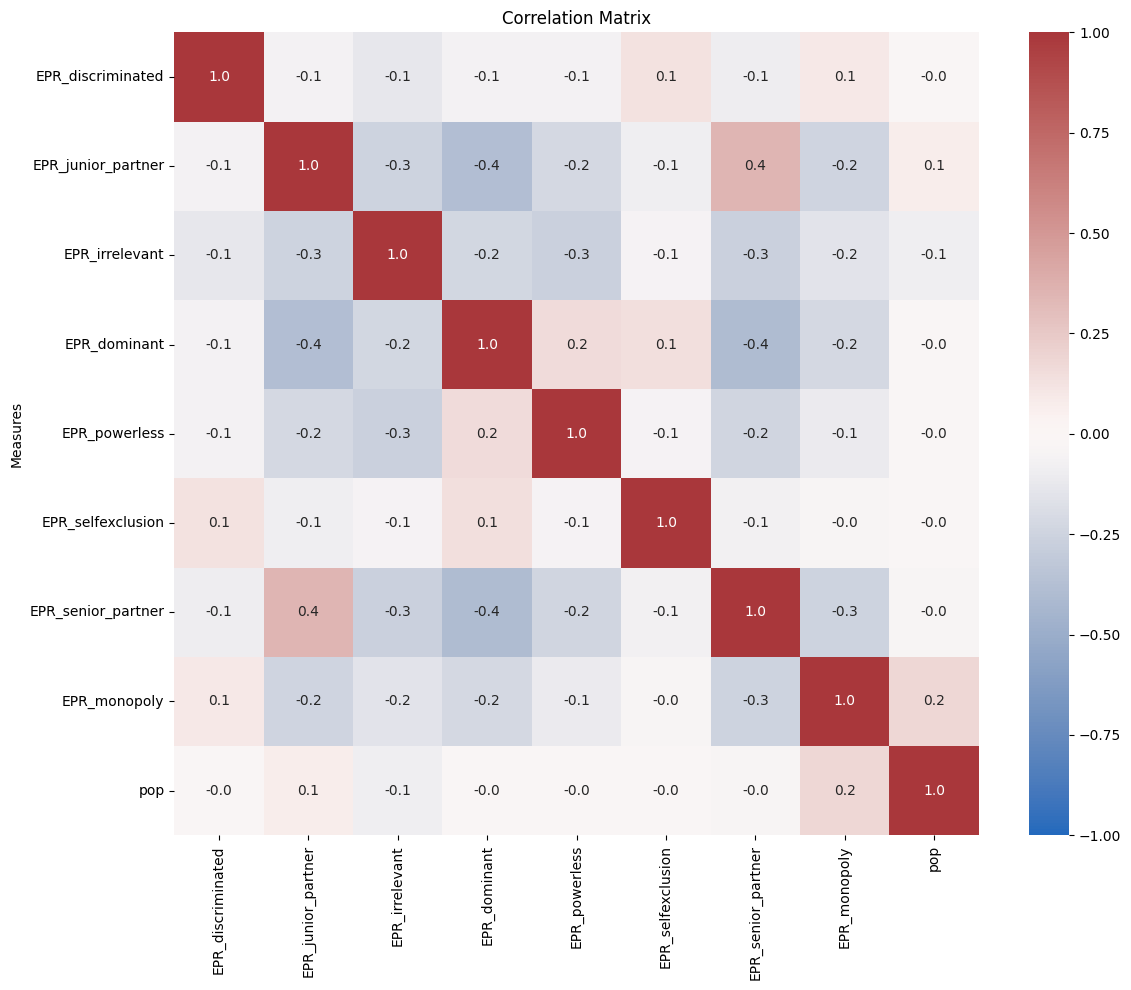

In [14]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_df, cmap='vlag', vmin=-1, vmax=1, annot=True, fmt=".1f")
plt.title('Correlation Matrix')
plt.ylabel('Measures')
plt.tight_layout()
plt.show()


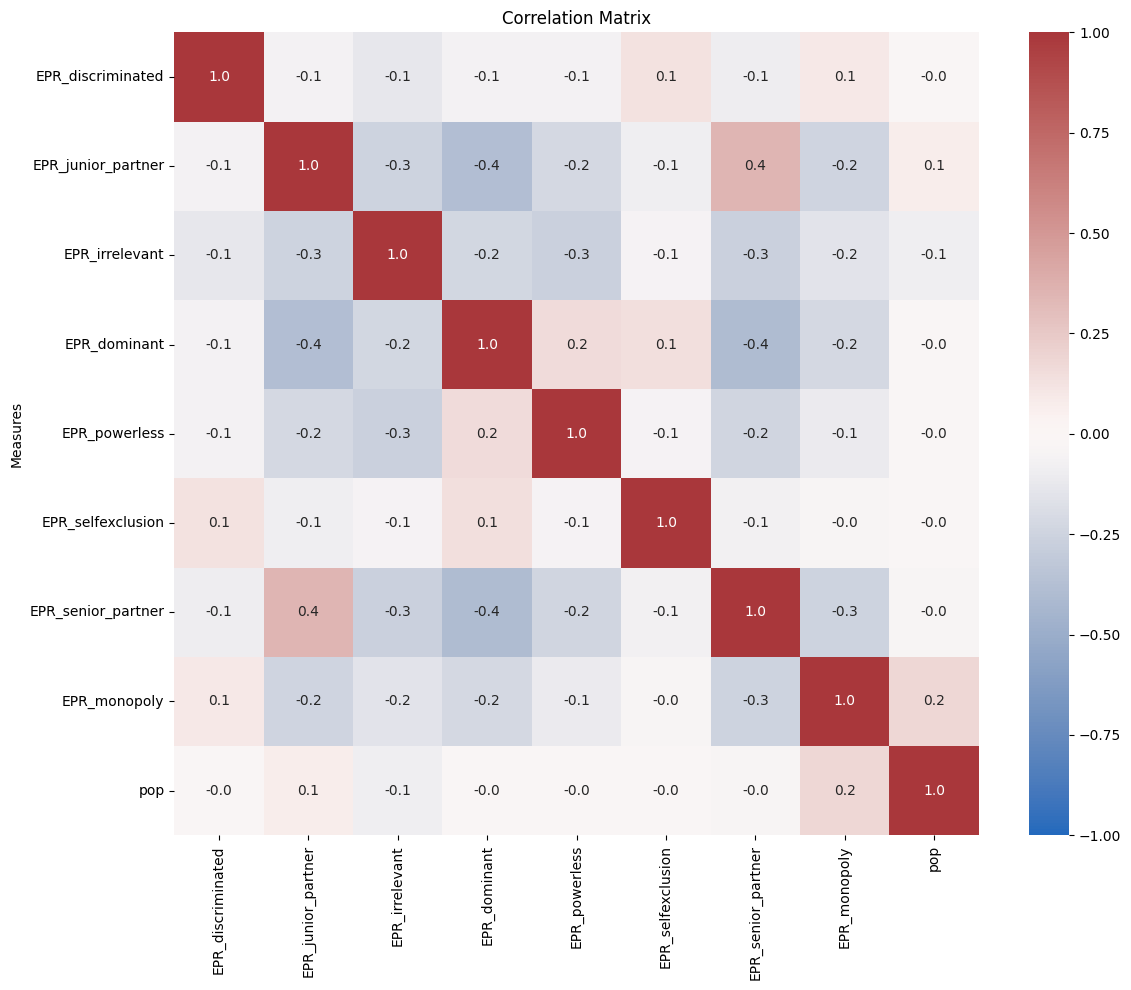

In [15]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_df, cmap='vlag', vmin=-1, vmax=1, annot=True, fmt=".1f")
plt.title('Correlation Matrix')
plt.ylabel('Measures')
plt.tight_layout()
plt.show()


### Principal Component Analysis 

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_df)
pca = PCA(n_components=0.75)
X_pca = pca.fit_transform(X_scaled)
n_components = X_pca.shape[1]
print(f"Number of components retained: {n_components}")
columns = [f'PC{i+1}' for i in range(n_components)]
print(f"Column names for PCA components: {columns}")

Number of components retained: 5
Column names for PCA components: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']


In [17]:
pca_df = pd.DataFrame(X_pca, index=numeric_df.index, columns=columns)
pca_correlation_matrix_df = pca_df.corr(method='pearson')

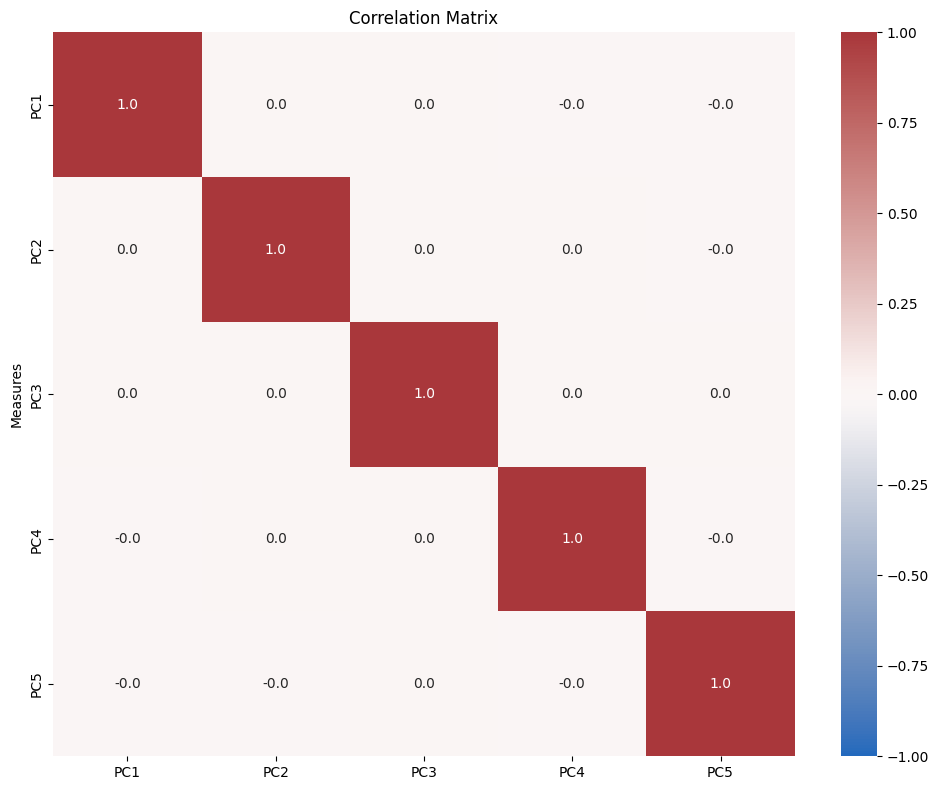

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(pca_correlation_matrix_df, cmap='vlag', vmin=-1, vmax=1, annot=True, fmt=".1f")
plt.title('Correlation Matrix')
plt.ylabel('Measures')
plt.tight_layout()
plt.show()

### Explained Variance

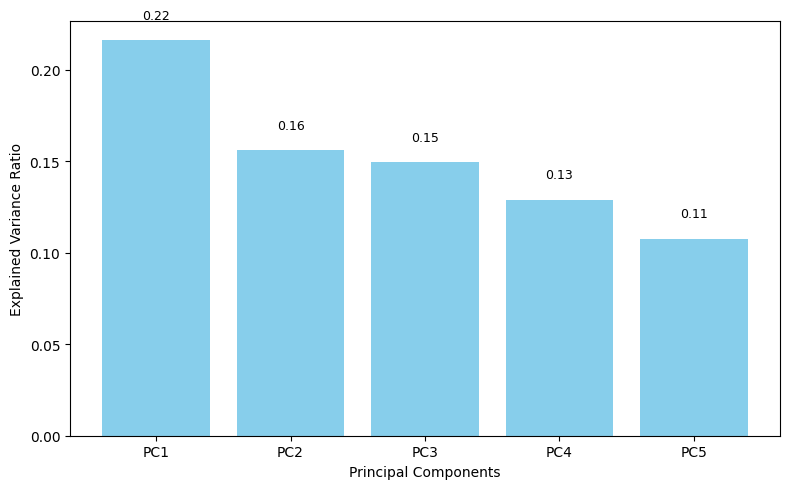

In [19]:
# Get explained variance ratios
explained_variance = pca.explained_variance_ratio_
components = np.arange(1, len(explained_variance) + 1)
labels = [f'PC{i}' for i in components]

# Plot bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(x=components, height=explained_variance, tick_label=labels, color='skyblue')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f"{height:.2f}",
             ha='center', va='bottom', fontsize=9)

plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
# plt.title('Explained Variance by Principal Component')
plt.tight_layout()
plt.show()

### Cumulative Variance

Cumulative explained variance at component 4: 0.6509


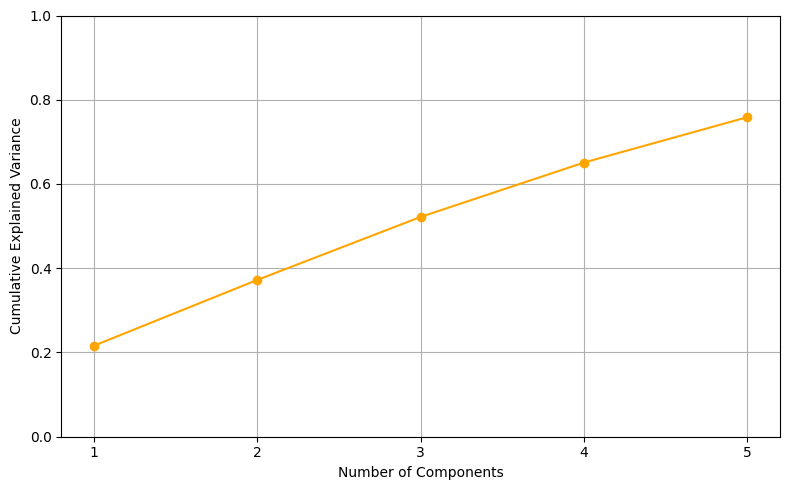

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming `pca` has already been fitted
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Specify the component number (e.g., n = 4)
n = 4 # Change this to your desired component index
if n <= len(cumulative_variance):
    print(f"Cumulative explained variance at component {n}: {cumulative_variance[n-1]:.4f}")
else:
    print(f"Component {n} exceeds the total number of components ({len(cumulative_variance)}).")

# Plot the cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='orange')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(np.arange(1, len(cumulative_variance) + 1, step=1))
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()


In [21]:
feature_names = numeric_df.columns
components = pca.components_
loadings_df = pd.DataFrame(components.T, index=feature_names, columns=[f'PC{i+1}' for i in range(components.shape[0])])

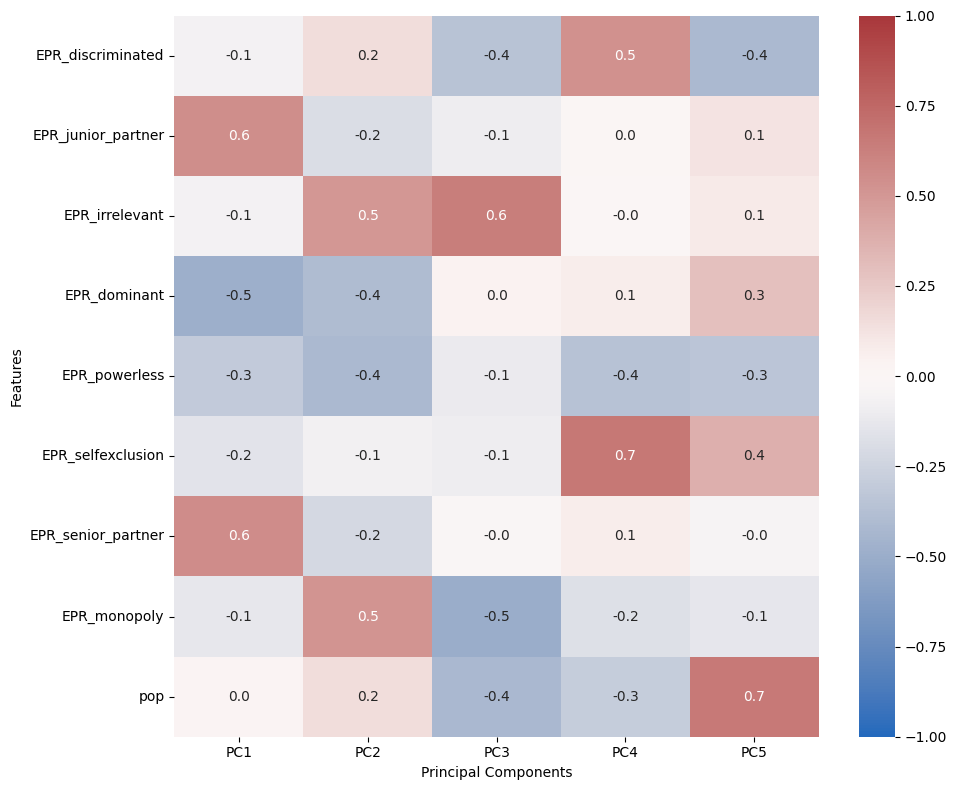

In [22]:
# create heatmap from loadings_df using sns
plt.figure(figsize=(10, 8))
sns.heatmap(loadings_df, cmap='vlag', vmin=-1, vmax=1, annot=True, fmt=".1f")
# plt.title('PCA Loadings Heatmap')
plt.xlabel('Principal Components')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [24]:
# Print PCA loadings matrix as plain text
print("🔢 PCA Loadings Matrix:\n")
print(loadings_df.round(2))  # Round to 2 decimal places for readability


🔢 PCA Loadings Matrix:

                     PC1   PC2   PC3   PC4   PC5
EPR_discriminated  -0.07  0.15 -0.36  0.54 -0.42
EPR_junior_partner  0.55 -0.19 -0.10  0.01  0.12
EPR_irrelevant     -0.06  0.51  0.63 -0.00  0.09
EPR_dominant       -0.49 -0.40  0.04  0.08  0.29
EPR_powerless      -0.31 -0.42 -0.11 -0.36 -0.34
EPR_selfexclusion  -0.15 -0.08 -0.09  0.67  0.38
EPR_senior_partner  0.56 -0.22 -0.02  0.08 -0.05
EPR_monopoly       -0.13  0.52 -0.50 -0.17 -0.13
pop                 0.02  0.15 -0.43 -0.30  0.66


## Physical Interpretation

### PC1- Power Inclusion vs Exclusion. This PC seems to contrast inclusive power roles (junior/senior partner) vs exclusive or autocratic control (dominant, powerless).
### PC2-Institutional Status Spectrum, Mix of politically irrelevant groups and monopoly groups
### PC3- Power Imbalance , Suggests a contrast between irrelevant groups and those with monopolistic
### PC4- Exclusionary Practices, Highlights self-exclusion and discrimination